<a href="https://colab.research.google.com/github/Ilvecho/yKv6QC0ApiFAR8p7/blob/main/Notebook_for_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import torch

from google.colab import files
files.upload()


Saving ACME-HappinessSurvey2020.csv to ACME-HappinessSurvey2020.csv


{'ACME-HappinessSurvey2020.csv': b'Y,X1,X2,X3,X4,X5,X6\r\n0,3,3,3,4,2,4\r\n0,3,2,3,5,4,3\r\n1,5,3,3,3,3,5\r\n0,5,4,3,3,3,5\r\n0,5,4,3,3,3,5\r\n1,5,5,3,5,5,5\r\n0,3,1,2,2,1,3\r\n1,5,4,4,4,4,5\r\n0,4,1,4,4,4,4\r\n0,4,4,4,2,5,5\r\n0,3,2,3,3,2,3\r\n0,4,4,3,4,4,4\r\n1,5,2,4,5,5,5\r\n0,4,2,4,5,4,3\r\n0,4,1,3,3,4,3\r\n1,3,2,4,3,4,4\r\n0,5,3,4,5,4,5\r\n1,5,1,4,3,4,5\r\n0,5,1,2,4,4,5\r\n0,4,2,4,4,4,4\r\n1,4,2,3,3,4,4\r\n0,4,3,5,5,5,4\r\n0,4,3,5,5,5,4\r\n1,5,1,2,5,2,4\r\n1,4,3,3,3,3,4\r\n0,3,4,3,3,2,3\r\n1,3,3,3,5,5,5\r\n1,3,3,1,3,3,4\r\n1,3,3,1,3,3,4\r\n1,5,3,3,3,5,3\r\n0,5,3,3,3,5,3\r\n0,4,1,3,4,4,5\r\n1,3,2,4,4,4,5\r\n1,3,2,4,4,4,5\r\n1,4,1,3,1,1,4\r\n0,4,2,3,3,4,4\r\n1,5,3,4,3,4,5\r\n1,5,3,4,3,4,5\r\n1,5,2,3,3,2,5\r\n1,4,4,3,4,2,4\r\n0,5,2,3,3,3,3\r\n1,4,2,4,3,2,4\r\n0,5,2,3,3,4,5\r\n0,4,3,3,4,2,4\r\n1,3,1,2,4,3,5\r\n1,5,3,4,4,4,5\r\n1,5,3,3,4,4,5\r\n0,1,1,1,3,1,4\r\n1,5,2,5,5,5,3\r\n1,5,1,3,3,4,4\r\n1,5,1,3,3,4,4\r\n1,5,1,3,3,4,4\r\n1,5,2,4,3,4,5\r\n1,5,2,4,3,4,5\r\n1,4,3,2,4,3,4\r\n1,4,3,2

In [2]:
data = pd.read_csv('ACME-HappinessSurvey2020.csv')
    
attributes = data.drop('Y', axis=1)
labels = data['Y']

# Missing Values and Outliers

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [5]:
print(data.isnull().sum())

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64


No null values.

Let's now check for outliers

In [ ]:
print(attributes)

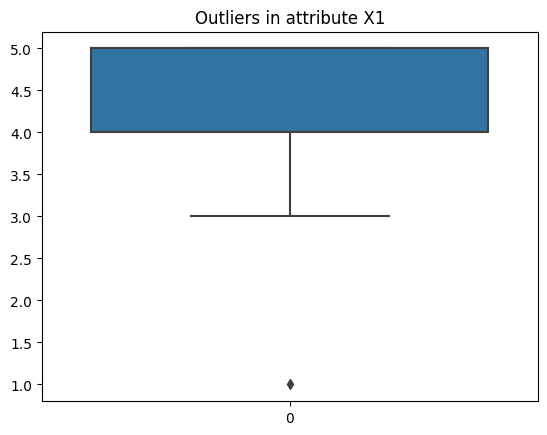

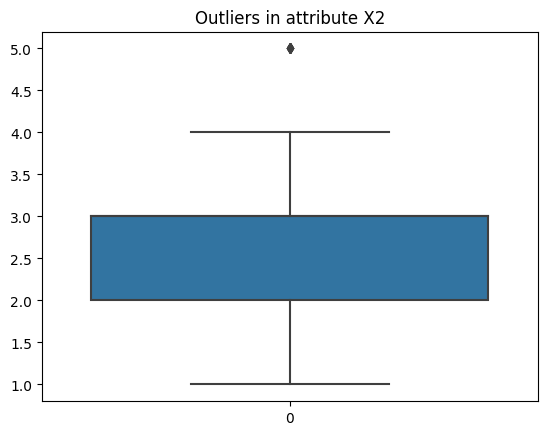

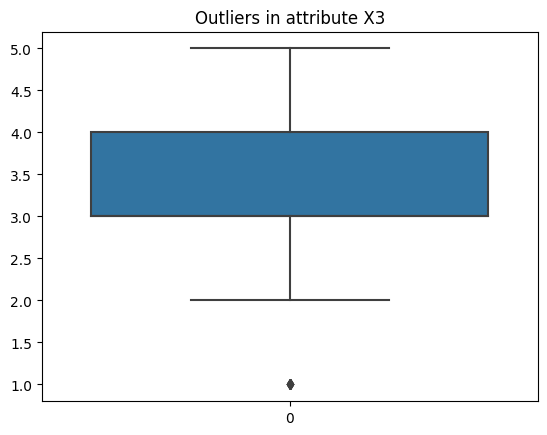

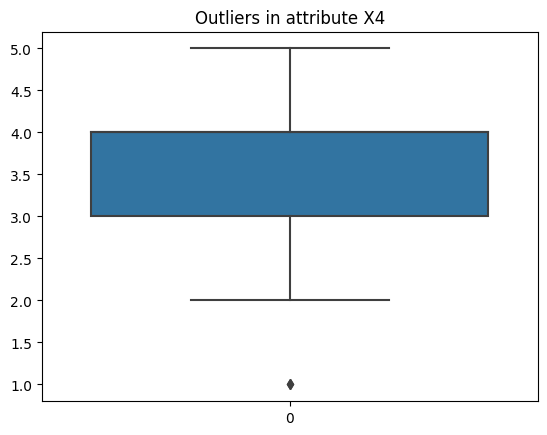

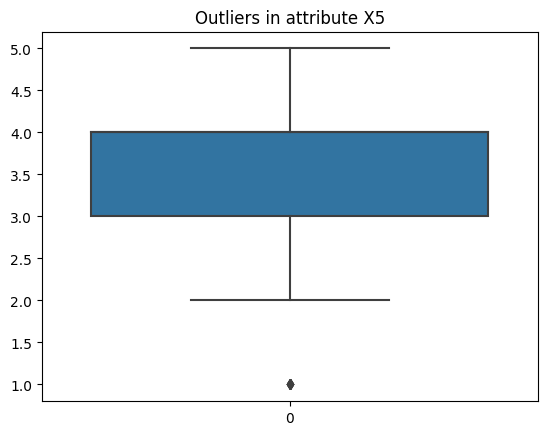

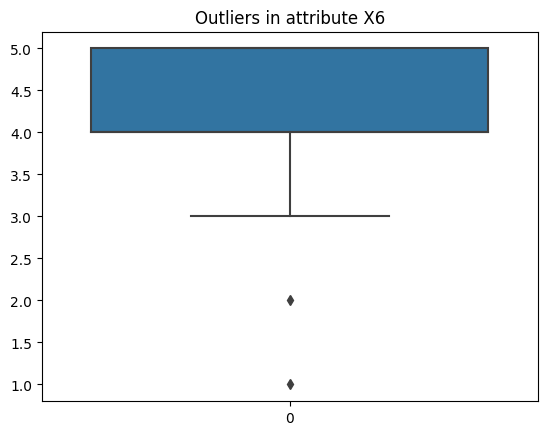

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in np.arange(attributes.shape[1]):
  fig = plt.figure()
  sns.boxplot(attributes.iloc[:, i]).set(title=f'Outliers in attribute X{i+1}')
  plt.show

We can see that for each question (attribute) there are few "outliers values".
Let's now trace back from the values to the "outliers samples"

In [26]:
# question X6 has two outlier values, so it is included in the list twice for code simplicity 
questions = [0, 1, 2, 3, 4, 5, 5]
outlier_values = [1, 5, 1, 1, 1, 1, 2]

outlier_samples = np.array([], dtype=int)

for i in np.arange(len(questions)):

  samples = np.where(attributes.iloc[:, questions[i]] == outlier_values[i])
  outlier_samples = np.concatenate((outlier_samples, np.array(samples[0])))

outlier_samples, counts = np.unique(outlier_samples, return_counts=True)

In [28]:
print(outlier_samples)
print(counts)

[  5   6  27  28  34  47  56  63  67  71  79  89  94  95 116 119 120]
[1 1 1 1 2 3 1 1 1 2 1 1 2 1 1 4 1]


In [30]:
print(outlier_samples[np.where(counts > 1)])
print(counts[np.where(counts > 1)])

[ 34  47  71  94 119]
[2 3 2 2 4]


# Correlation

Compute the correlation between each question (X1, ..., X6) with the Label Y

In [ ]:
corr = attributes.corrwith(labels)
print(corr)

X1    0.280160
X2   -0.024274
X3    0.150838
X4    0.064415
X5    0.224522
X6    0.167669
dtype: float64


From the correlation, it seems that questions X2 and X4 have small influence on the label. 

Might exclude these two attributes from the model.

Next, we divide the samples based on the label, and analyze the features looking for differences between the two subsets


In [3]:
print(attributes.corr())

          X1        X2        X3        X4        X5        X6
X1  1.000000  0.059797  0.283358  0.087541  0.432772  0.411873
X2  0.059797  1.000000  0.184129  0.114838  0.039996 -0.062205
X3  0.283358  0.184129  1.000000  0.302618  0.358397  0.203750
X4  0.087541  0.114838  0.302618  1.000000  0.293115  0.215888
X5  0.432772  0.039996  0.358397  0.293115  1.000000  0.320195
X6  0.411873 -0.062205  0.203750  0.215888  0.320195  1.000000


Attribute X2 has a low correlation with all the other attributes. This means that it contains different information respect all the other attributes.
This, combined with the fact that X2 is weakily correlated with Y, could mean that we can drop X2 from the model.

The rest of the attributes have medium correlation amongst each other.

In [ ]:
happy = attributes.loc[labels == 1, :]
unhappy = attributes.loc[labels == 0, :]

Analyze the distribution of the answers for each question

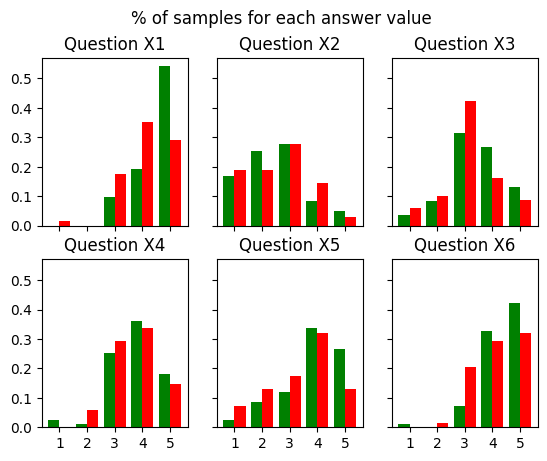

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)
fig.suptitle("% of samples for each answer value")
questions = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

for i in np.arange(6):
# i = 0
  col_happy = happy[questions[i]].to_numpy()
  col_unhappy = unhappy[questions[i]].to_numpy()

  hist_happy, edges_happy = np.histogram(col_happy, bins = 5, range=(0,6), density=True)
  hist_unhappy, edges_unhappy = np.histogram(col_unhappy, bins = 5, range=(0,6), density=True)

  centers = np.array([1, 2, 3, 4, 5])
  xwidth = 0.4 
  happy_centers = centers - 0.2 * np.ones_like(centers)
  unhappy_centers = centers + 0.2 * np.ones_like(centers)

  ax[int(i/3), int(i%3)].bar(happy_centers, height=hist_happy, width=0.4, color='g')
  ax[int(i/3), int(i%3)].bar(unhappy_centers, height=hist_unhappy, width=0.4, color='r')
  ax[int(i/3), int(i%3)].set_xticks([1, 2, 3, 4, 5])
  ax[int(i/3), int(i%3)].set_title('Question ' + questions[i])

plt.show()

So far we have considered the response to each question independently from the others. 

Let's now look for relationship between questions.

         PC0       PC1       PC2       PC3       PC4       PC5
X1 -0.327148 -0.119661  0.305456  0.367267 -0.312482 -0.743520
X2 -0.201344  0.921146  0.306782 -0.042546 -0.090016  0.083193
X3 -0.495695  0.143426 -0.649090  0.510136  0.208766  0.092606
X4 -0.308330  0.049018 -0.457531 -0.721146 -0.296756 -0.291685
X5 -0.659448 -0.263943  0.414688 -0.263992  0.472833  0.173878
X6 -0.277097 -0.211023  0.099811  0.115427 -0.734189  0.562466


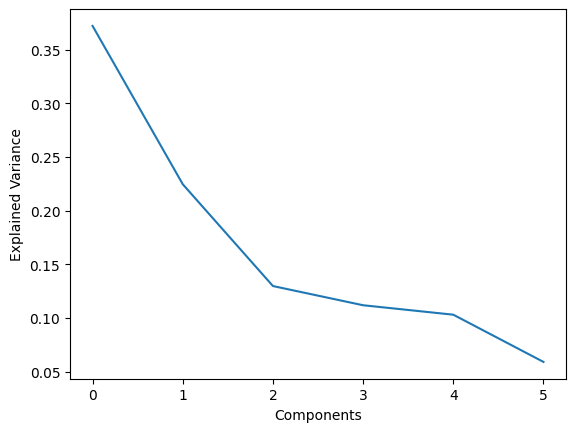

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(attributes)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T, columns=['PC%s' % _ for _ in range(len(attributes.columns))], index=attributes.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

The PCA highlights that the 6 questions can be reduced to 5 - with almost no lost of information; 

If wanted, the number of questions could be reduce to 3 with little information lost. 

This tells us that we can drop one of the attributes - most likely X2 in light of previous analysis

In [ ]:
questions_corr_happy = happy.corr()
print(questions_corr_happy)

          X1        X2        X3        X4        X5        X6
X1  1.000000  0.023447  0.337346  0.035243  0.421133  0.193307
X2  0.023447  1.000000  0.029581  0.178585  0.075630 -0.158829
X3  0.337346  0.029581  1.000000  0.355997  0.345813  0.342704
X4  0.035243  0.178585  0.355997  1.000000  0.297182  0.324379
X5  0.421133  0.075630  0.345813  0.297182  1.000000  0.233802
X6  0.193307 -0.158829  0.342704  0.324379  0.233802  1.000000


In happy customers answers, we can notice a relevant correlation between question X1 and question X5;

Also, a smaller correlation between 

*   X1 with X3
*   X3 with X4
*   X3 with X5
*   X3 with X6



Note that X2 is weakily correlated to the other questions - which means that it carries different information; however, as we saw, it is weakily correlated with the label as well, these different information have a little influence on the label



In [ ]:
questions_corr_unhappy = unhappy.corr()
print(questions_corr_unhappy)

          X1        X2        X3        X4        X5        X6
X1  1.000000  0.114570  0.172767  0.113233  0.373147  0.562398
X2  0.114570  1.000000  0.382896  0.039066  0.016020  0.049416
X3  0.172767  0.382896  1.000000  0.219821  0.328440  0.003337
X4  0.113233  0.039066  0.219821  1.000000  0.276522  0.072660
X5  0.373147  0.016020  0.328440  0.276522  1.000000  0.354262
X6  0.562398  0.049416  0.003337  0.072660  0.354262  1.000000


In Unhappy customers, there is a relevant correlation between question X1 and question X6;

furthermore, there is a smaller but still relevant correlation between 
*   X1 with X5
*   X2 with X3
*   X5 with X6

Note, lastly, that also for Unhappy customers X2 is weakily correlated to the other questions (except X3, as already mentioned)

Let's now see the frequency of each answer in the samples

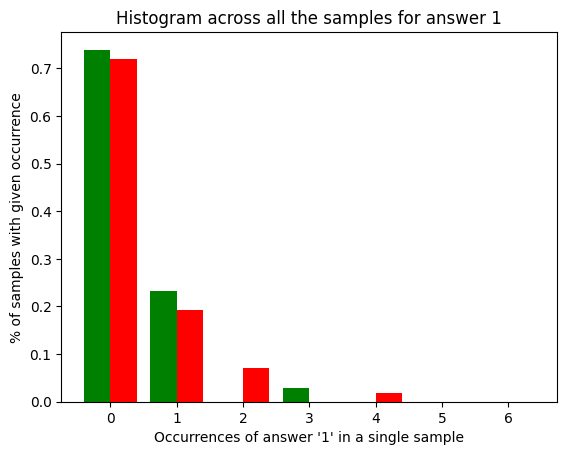

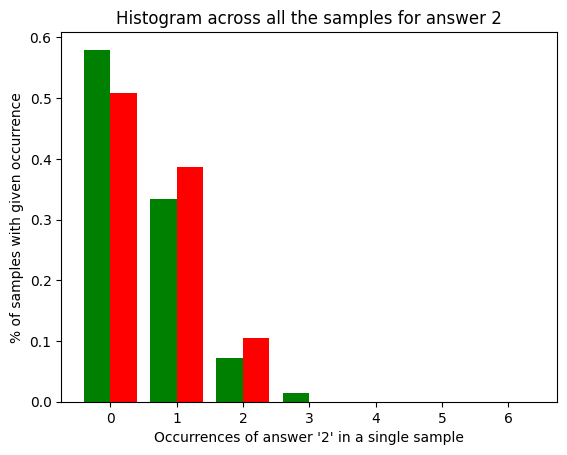

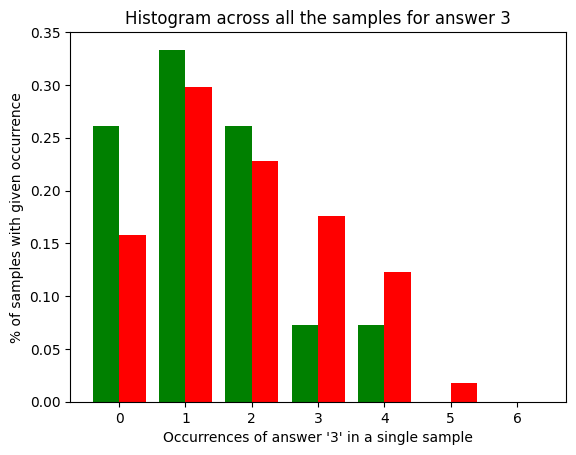

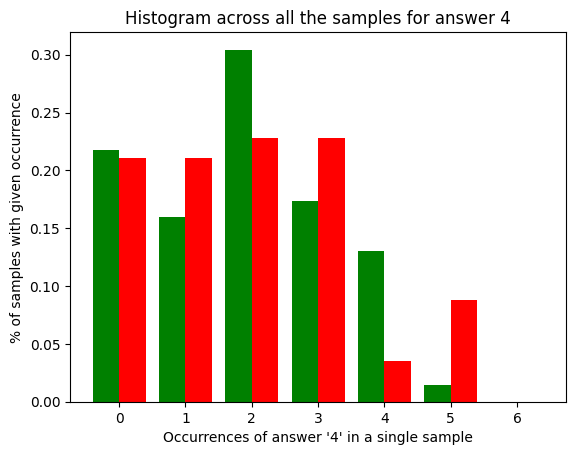

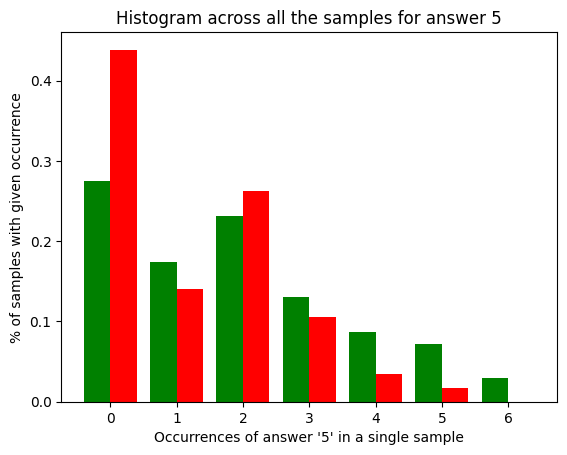

In [ ]:
centers = np.array([0, 1, 2, 3, 4, 5, 6])
xwidth = 0.4 
happy_centers = centers - 0.2 * np.ones_like(centers)
unhappy_centers = centers + 0.2 * np.ones_like(centers)

# answer_value = 5
for answer_value in np.arange(1,6):
  hist_happy, _ = np.histogram(np.sum(happy == answer_value, axis=1), bins=7, range=(0,7), density=True)
  hist_unhappy, _ = np.histogram(np.sum(unhappy == answer_value, axis=1), bins=7, range=(0,7), density=True)

  fig = plt.figure()
  plt.bar(happy_centers, height=hist_happy, width=0.4, color='g')
  plt.bar(unhappy_centers, height=hist_unhappy, width=0.4, color='r')

  plt.title(f"Histogram across all the samples for answer {answer_value}")
  plt.xlabel(f"Occurrences of answer '{answer_value}' in a single sample")
  plt.ylabel("% of samples with given occurrence")
  plt.show()

From the graphs above, we can draw some approximative conclusions:
*   If there are three or more answers with value '3', then it's likely that the customer is Unhappy
*    If there are zero answers with value '5', then it's likely that the customer is Unhappy

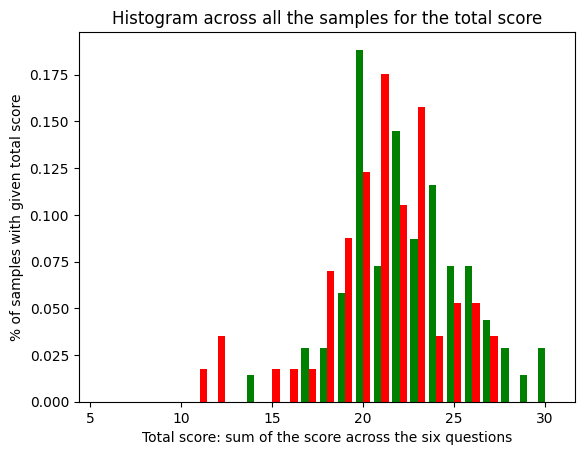

In [ ]:
centers = np.arange(6, 31)
xwidth = 0.4 
happy_centers = centers - 0.2 * np.ones_like(centers)
unhappy_centers = centers + 0.2 * np.ones_like(centers)

hist_happy, _ = np.histogram(np.sum(happy, axis=1), bins=25, range=(6,31), density=True)
hist_unhappy, _ = np.histogram(np.sum(unhappy, axis=1), bins=25, range=(6,31), density=True)

fig = plt.figure()
plt.bar(happy_centers, height=hist_happy, width=0.4, color='g')
plt.bar(unhappy_centers, height=hist_unhappy, width=0.4, color='r')

plt.title("Histogram across all the samples for the total score")
plt.xlabel("Total score: sum of the score across the six questions")
plt.ylabel("% of samples with given total score")
plt.show()

From the graph above, we can conclude that if the total score is lower than 16, then most likely the customer is unhappy. 

Similarly, if the total score is 28 or higher, then the customer most likely is happy.

**Preliminary Analysis conclusions**

The above analysis concluded that there are some relationships between the features and the label, as well as relationships between the different features. 

During this analysis, we manually identified few of these relationships, however we will let out Random Forest model to identify which are the best relationships to consider, in order to maximise prediction accuracy